# Machine Learning Tutorial Workthrough with R
1. Installing the R platform.
1. Loading the dataset.
1. Summarizing the dataset.
1. Visualizing the dataset.
1. Evaluating some algorithms.
1. Making some predictions.

In [1]:
# To add caret package with needed dependencies. NOTE: This takes forever and I do not suggest running the code this way.
    # install.packages("caret", dependencies=c("Depends", "Suggests"))
    # library(caret)

In [2]:
library(caret)
install.packages('ellipse')
install.packages('e1071', dependencies=TRUE)
library(ellipse)
library(e1071)
install.packages("kernlab")
library(kernlab)

Warning message:
“package ‘caret’ was built under R version 4.0.5”
Loading required package: lattice

Warning message:
“package ‘lattice’ was built under R version 4.0.3”
Loading required package: ggplot2

Warning message:
“package ‘ggplot2’ was built under R version 4.0.5”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


Attaching package: ‘ellipse’


The following object is masked from ‘package:graphics’:

    pairs


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


Attaching package: ‘kernlab’


The following object is masked from ‘package:ggplot2’:

    alpha




In [3]:
# Attach the iris dataset to the environment
data(iris)
# Rename the dataset
dataset <- iris

## Loading the data set from a .csv file
### Define the filename
filename <- "iris.csv"
### load the CSV file from the local directory
dataset <- read.csv(filename, header=FALSE)
### set the column names in the dataset
colnames(dataset) <- c("Sepal.Length","Sepal.Width","Petal.Length","Petal.Width","Species")

In [4]:
# Create a list of 80% of the rows in the original dataset we can use for training
validation_index <- createDataPartition(dataset$Species, p=0.80, list=FALSE)
# Select 20% of the data for validation
validation <- dataset[-validation_index,]
# Use the remaining 80% of data to training and testing the models
dataset <- dataset[validation_index,]

In [5]:
# Dimensions of dataset
dim(dataset)

# Convert character column to factor column
    # dataset$Species=as.factor (dataset$Species)

# List types for each attribute
sapply(dataset, class)
# Take a peek at the first 5 rows of the data
head(dataset)
# List the levels for the class
levels(dataset$Species)

[1] 120   5

Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
   "numeric"    "numeric"    "numeric"    "numeric"     "factor"

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa


[1] "setosa"     "versicolor" "virginica"

In [6]:
# Summarize the class distribution
percentage <- prop.table(table(dataset$Species)) * 100
cbind(freq=table(dataset$Species), percentage=percentage)

,freq,percentage
setosa,40,33.33333
versicolor,40,33.33333
virginica,40,33.33333


In [7]:
# Summarize attribute distributions
summary(dataset)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.400   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.400   Median :1.300  
 Mean   :5.865   Mean   :3.092   Mean   :3.763   Mean   :1.212  
 3rd Qu.:6.425   3rd Qu.:3.400   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :40  
 versicolor:40  
 virginica :40  
                
                
                

In [8]:
# Split input (Sepal and Petal Dimensions) and output (Species)
x <- dataset[,1:4]
y <- dataset[,5]

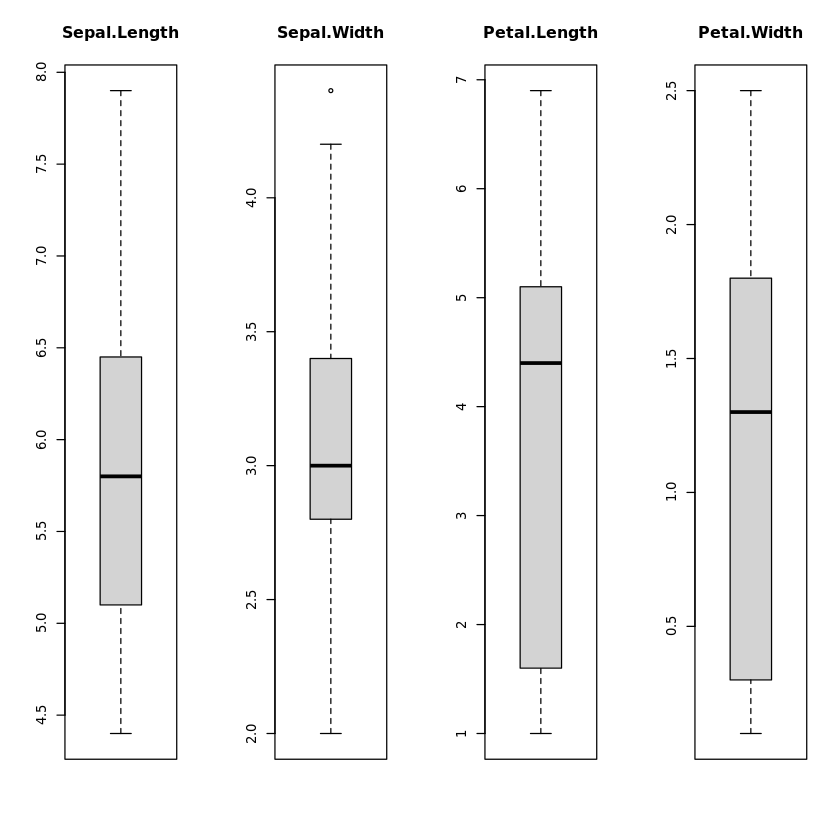

In [9]:
# Boxplot for each attribute on one image
par(mfrow=c(1,4))
  for(i in 1:4) {
  boxplot(x[,i], main=names(iris)[i])
}

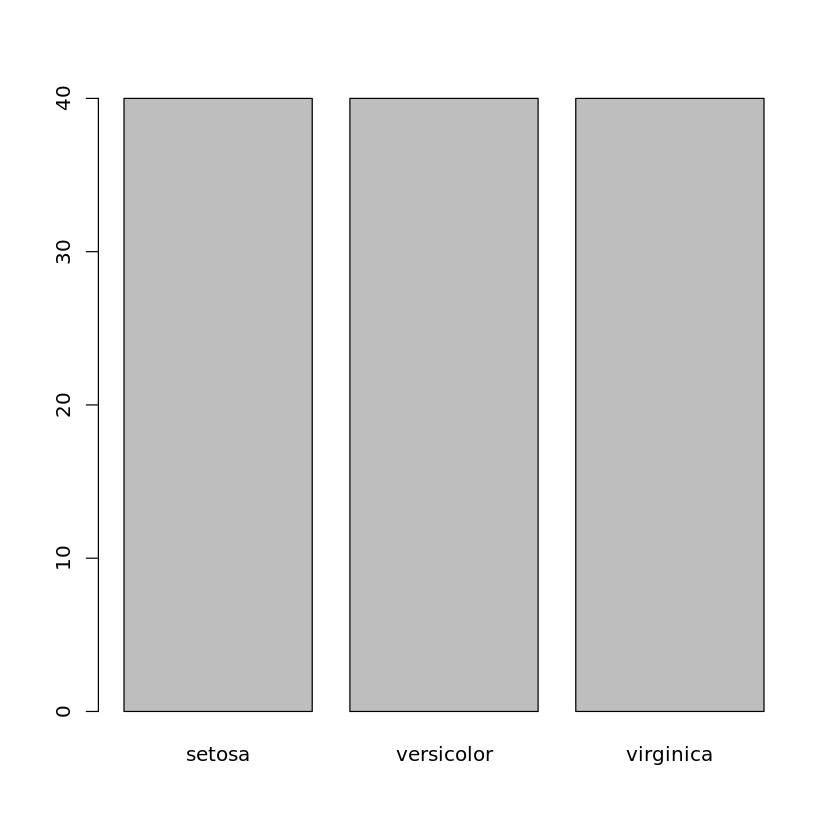

In [10]:
# Barplot for class breakdown
plot(y)

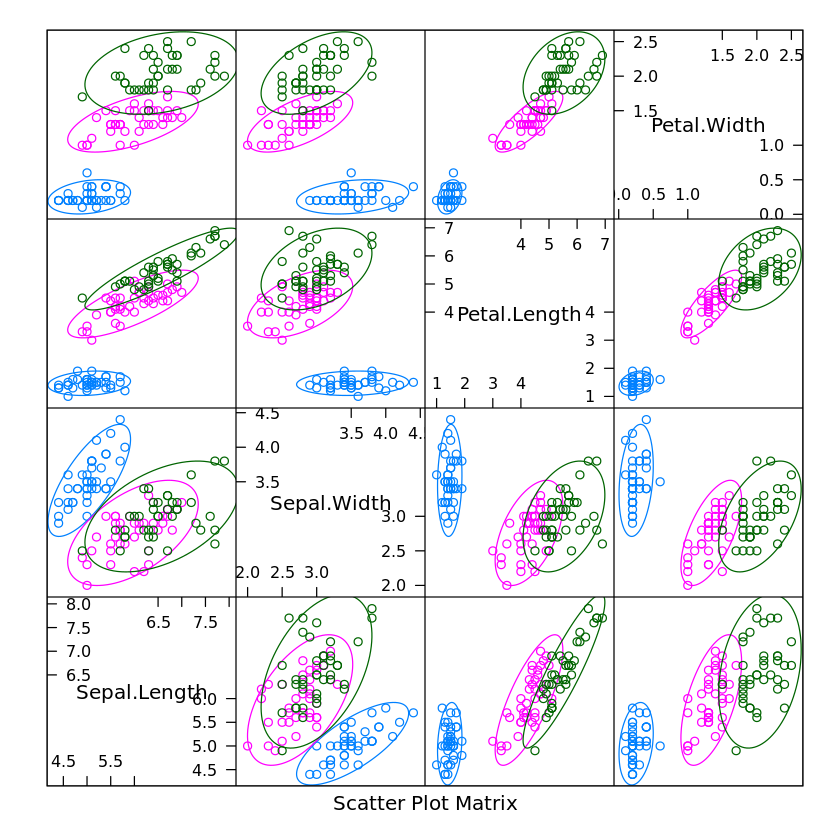

In [11]:
# Scatterplot matrix
featurePlot(x=x, y=y, plot="ellipse")

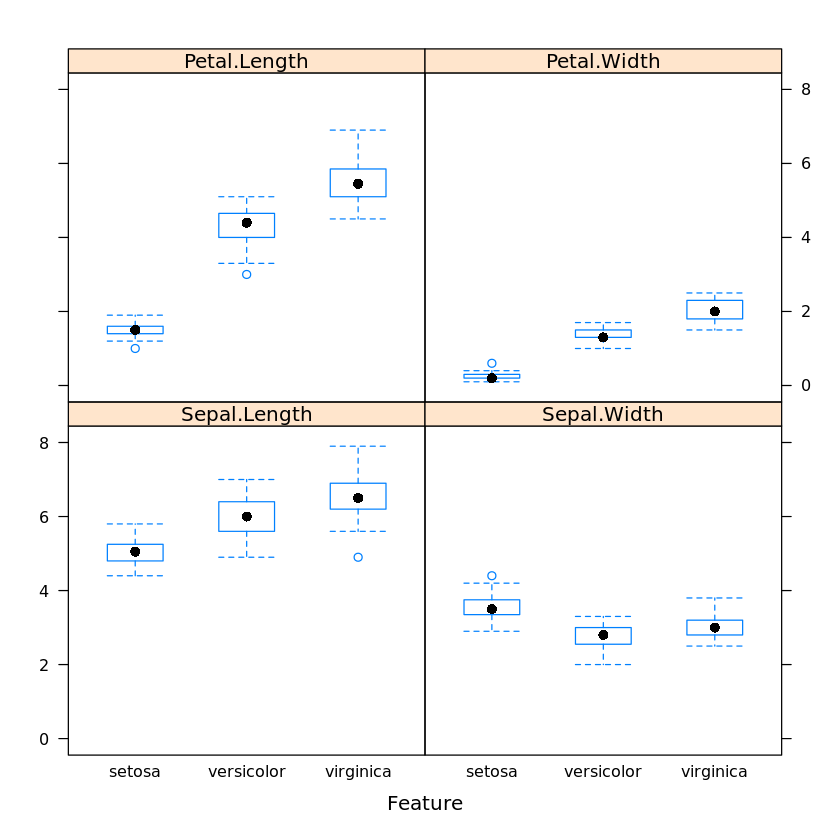

In [12]:
# Box and whisker plots for each attribute
featurePlot(x=x, y=y, plot="box")

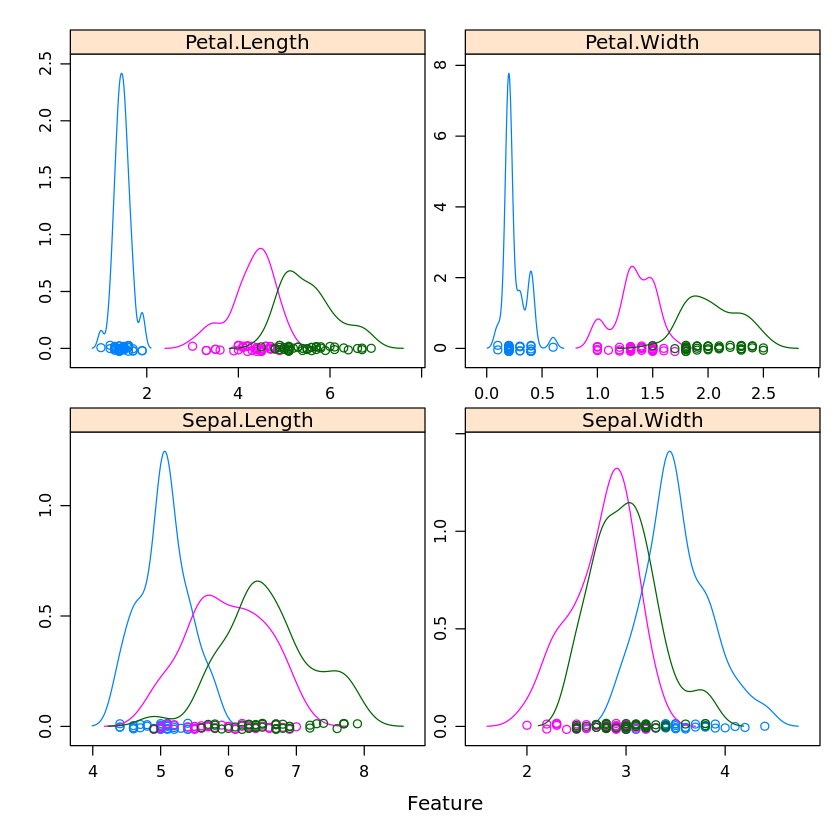

In [13]:
# Density plots for each attribute by class value
scales <- list(x=list(relation="free"), y=list(relation="free"))
featurePlot(x=x, y=y, plot="density", scales=scales)

In [14]:
# Run algorithms using 10-fold cross validation
control <- trainControl(method="cv", number=10)
metric <- "Accuracy"
# a) linear algorithms
set.seed(7)
fit.lda <- train(Species~., data=dataset, method="lda", metric=metric, trControl=control)
# b) nonlinear algorithms
# CART
set.seed(7)
fit.cart <- train(Species~., data=dataset, method="rpart", metric=metric, trControl=control)
# kNN
set.seed(7)
fit.knn <- train(Species~., data=dataset, method="knn", metric=metric, trControl=control)
# c) advanced algorithms
# SVM
set.seed(7)
fit.svm <- train(Species~., data=dataset, method="svmRadial", metric=metric, trControl=control)
# Random Forest
set.seed(7)
fit.rf <- train(Species~., data=dataset, method="rf", metric=metric, trControl=control)

In [15]:
# Summarize accuracy of models
results <- resamples(list(lda=fit.lda, cart=fit.cart, knn=fit.knn, svm=fit.svm, rf=fit.rf))
summary(results)


Call:
summary.resamples(object = results)

Models: lda, cart, knn, svm, rf 
Number of resamples: 10 

Accuracy 
          Min. 1st Qu. Median      Mean 3rd Qu. Max. NA's
lda  0.9166667  1.0000      1 0.9833333       1    1    0
cart 0.8333333  1.0000      1 0.9750000       1    1    0
knn  0.9166667  1.0000      1 0.9833333       1    1    0
svm  0.9166667  0.9375      1 0.9750000       1    1    0
rf   0.8333333  0.9375      1 0.9666667       1    1    0

Kappa 
      Min. 1st Qu. Median   Mean 3rd Qu. Max. NA's
lda  0.875 1.00000      1 0.9750       1    1    0
cart 0.750 1.00000      1 0.9625       1    1    0
knn  0.875 1.00000      1 0.9750       1    1    0
svm  0.875 0.90625      1 0.9625       1    1    0
rf   0.750 0.90625      1 0.9500       1    1    0


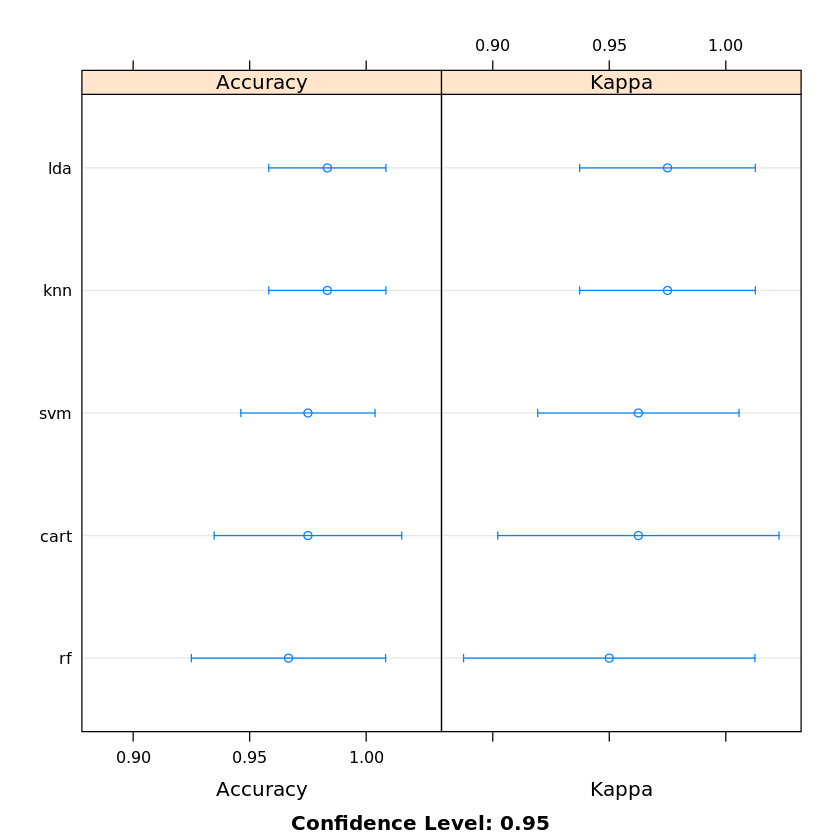

In [16]:
# Compare accuracy of models
dotplot(results)

In [17]:
# Summarize Best Model
print(fit.lda)

Linear Discriminant Analysis 

120 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 108, 108, 108, 108, 108, 108, ... 
Resampling results:

  Accuracy   Kappa
  0.9833333  0.975



In [18]:
# Estimate skill of LDA on the validation dataset
predictions <- predict(fit.lda, validation)
confusionMatrix(predictions, validation$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         10          0         0
  versicolor      0          9         3
  virginica       0          1         7

Overall Statistics
                                          
               Accuracy : 0.8667          
                 95% CI : (0.6928, 0.9624)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : 2.296e-09       
                                          
                  Kappa : 0.8             
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.9000           0.7000
Specificity                 1.0000            0.8500           0.9500
Pos Pred Value              1.0000            0.7500           0.8750
Neg Pred Value              1.0000            0.9444           0.8636
P